In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import joblib

In [2]:
data=pd.read_csv('House_Rent_Dataset.csv')
print(data)

       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Ka

In [4]:
#cleaning Data
data.isnull()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
data.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [7]:
data['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [8]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
len(data['Area Locality'].unique())

2235

In [10]:
#relantionship analysis
corelation = data.corr()

<AxesSubplot:>

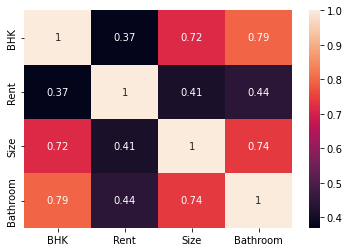

In [11]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,
            annot=True)


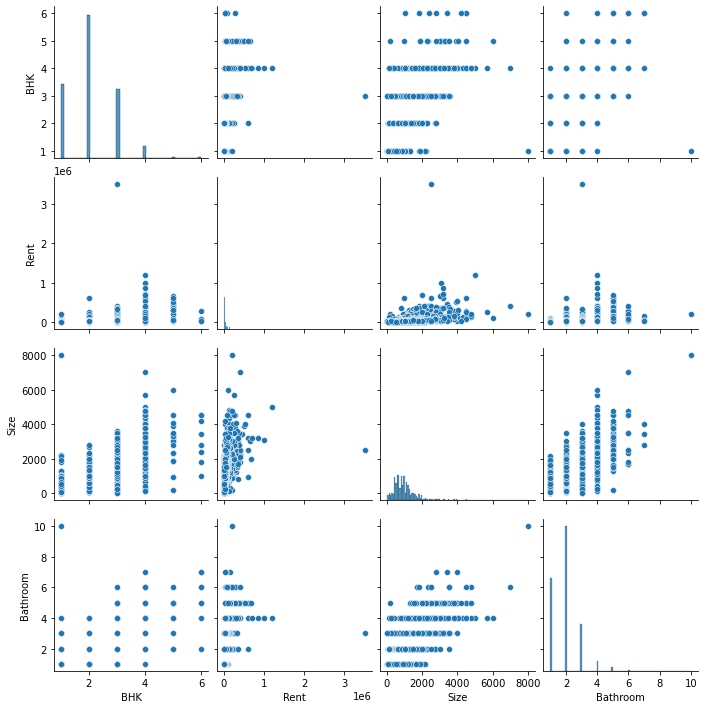

In [12]:
#use to plot relationship between two variables
sns.pairplot(data)

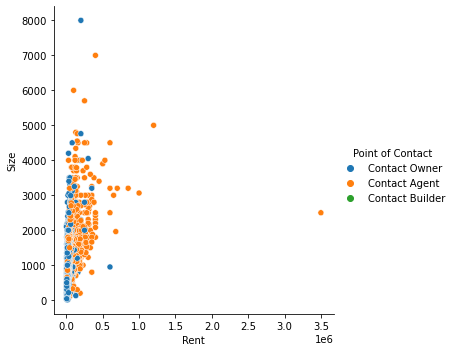

In [13]:
sns.relplot(x='Rent',y='Size',hue='Point of Contact',data=data)

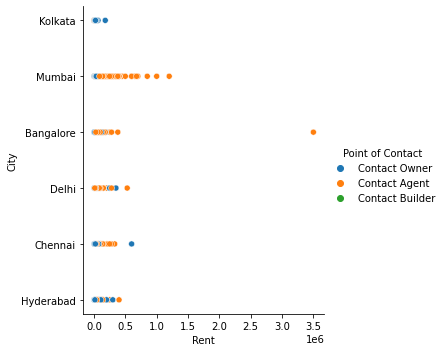

In [14]:
sns.relplot(x='Rent',y='City',hue='Point of Contact',data=data)

<AxesSubplot:xlabel='Rent', ylabel='City'>

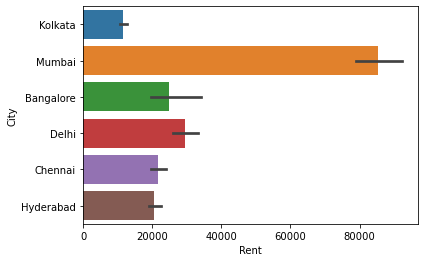

In [15]:
sns.barplot(x='Rent',y='City',data=data)

<AxesSubplot:xlabel='Rent', ylabel='Area Type'>

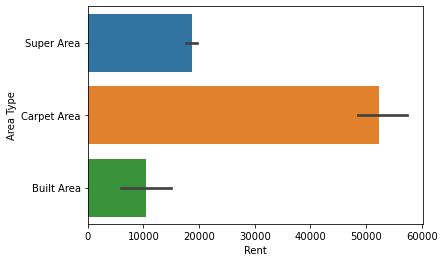

In [16]:
sns.barplot(x='Rent',y='Area Type',data=data)

<AxesSubplot:xlabel='BHK', ylabel='Size'>

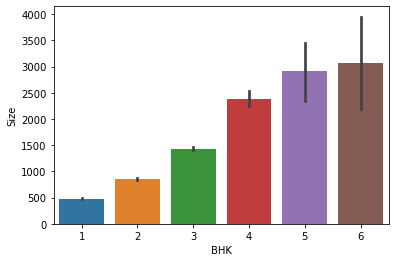

In [19]:
sns.barplot(x='BHK',y='Size',data=data)

In [20]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
## Dealing with Floor Feature
data['Floor']=data['Floor'].str[0]
data['Floor']=data['Floor'].map({'L':-1,'G':0,"U":0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9})

In [22]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [23]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                 int64
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()

In [25]:
data.City=lb.fit_transform(data.City)

In [26]:
data['Area Type']=lb.fit_transform(data.iloc[:,5].values)
data['Area Locality']=lb.fit_transform(data.iloc[:,6].values)
data['Furnishing Status']=lb.fit_transform(data.iloc[:,8].values)
data['Tenant Preferred']=lb.fit_transform(data.iloc[:,9].values)
data['Point of Contact']=lb.fit_transform(data.iloc[:,10].values)


In [27]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0,2,221,4,2,1,2,1
1,2022-05-13,2,20000,800,1,2,1527,4,1,1,1,0
2,2022-05-16,2,17000,1000,1,2,1760,4,1,1,1,0
3,2022-07-04,2,10000,800,1,2,526,4,2,1,1,0
4,2022-05-09,2,7500,850,1,1,1890,4,2,0,1,0


In [28]:
#relantionship analysis
corelation = data.corr()

<AxesSubplot:>

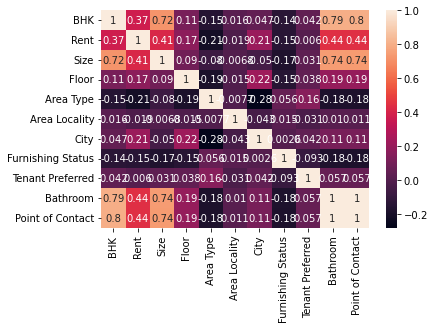

In [29]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,
            annot=True)

In [53]:
data = data.drop(['Bathroom'],axis=1)

In [54]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,2,10000,1100,0,2,221,4,2,1,1
1,2022-05-13,2,20000,800,1,2,1527,4,1,1,0
2,2022-05-16,2,17000,1000,1,2,1760,4,1,1,0
3,2022-07-04,2,10000,800,1,2,526,4,2,1,0
4,2022-05-09,2,7500,850,1,1,1890,4,2,0,0


In [30]:
from sklearn.model_selection import train_test_split
x = np.array(data[["BHK","Size","Floor","Area Type","City","Furnishing Status","Tenant Preferred"]])
y = data['Rent']

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [32]:
#using XGBoost
from xgboost import XGBRegressor
regressor  = XGBRegressor()

In [33]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
Y_pred_train = regressor.predict(X_train)

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
def rmsle(y_pred,y_test) :
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() *0.5
    Acc = (1 - error)*100
    return Acc

In [37]:
print("Accuracy attained on Training Set = ",rmsle(Y_pred_train, Y_train))
print("Accuracy attained on Test Set = ",rmsle(y_pred,Y_test))

Accuracy attained on Training Set =  99.08539140255328
Accuracy attained on Test Set =  97.9022397569323


C:\Users\MedaD\AppData\Local\Temp\ipykernel_14544\1711975573.py:2: RuntimeWarning: invalid value encountered in log10
  error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() *0.5


In [39]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Enter the FLoor: "))
e = int(input("enter the city(Mumbai =1,chennai=2,Bangalore=3,Hyderabad=4,delhi=5,kolkata=4)"))
f = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
g = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
features = np.array([[a, b, c, d, e, f,g]])
print("Predicted House Price = ", regressor.predict(features))


Enter House Details to Predict Rent


Number of BHK:  1
Size of the House:  850
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3):  1
Enter the FLoor:  0
enter the city(Mumbai =1,chennai=2,Bangalore=3,Hyderabad=4,delhi=5,kolkata=4) 1
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2):  1
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3):  1


Predicted House Price =  [11938.876]


In [40]:
from joblib import dump
dump(regressor,'model_joblib')

['model_joblib']

In [41]:
regressor = joblib.load('model_joblib')

In [42]:
print(regressor)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [43]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [81]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from typing import Optional
from joblib import load
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import requests
import json

In [76]:
app = FastAPI()
@app.get('/hi')
def hello():
    return 'Deekshitha'

In [82]:
app = FastAPI()

In [84]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins = origins,
    allow_credentials =True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [85]:
class model_input(BaseModel):
    BHK: int
    Size: int
    Floor: int
    AreaType:int
    City:int
    FurnishingStatus:int
    TenantPreferred:int
    

In [86]:
@app.post('/prediction')
def prediction(input_parameters:model_input):
    input_data = input_parameters.json()
    input_dict = json.loads(input_data)
    
 
    BHK = input_dict['BHK']
    Size= input_dict['Size']
    Floor = input_dict['Floor']
    AreaType = input_dict['Area Type']
    City= input_dict['City']
    FurnishingStatus = input_dict['Furnishing Status']
    TenantPreferred = input_dict['Tenant Preferred']
    point = input_dict['Point Of Contact']
        
    input_list = ['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred']
    Rent = regressor.predict([input_list])
 

In [77]:
import uvicorn
import nest_asyncio
nest_asyncio.apply()
uvicorn.run(app,port=8001)


INFO:     Started server process [14544]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [14544]
